In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('car data.csv')

In [3]:

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Check Missing Values
print('Missing Values:')
df.isnull().sum()

Missing Values:


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [8]:
# Data types of columns
print(" Data types of columns:")
print(df.dtypes)

 Data types of columns:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [9]:
# check for duplicate values
print('Duplicate Values:')
df.duplicated().sum()

Duplicate Values:


2

In [10]:
# drop duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

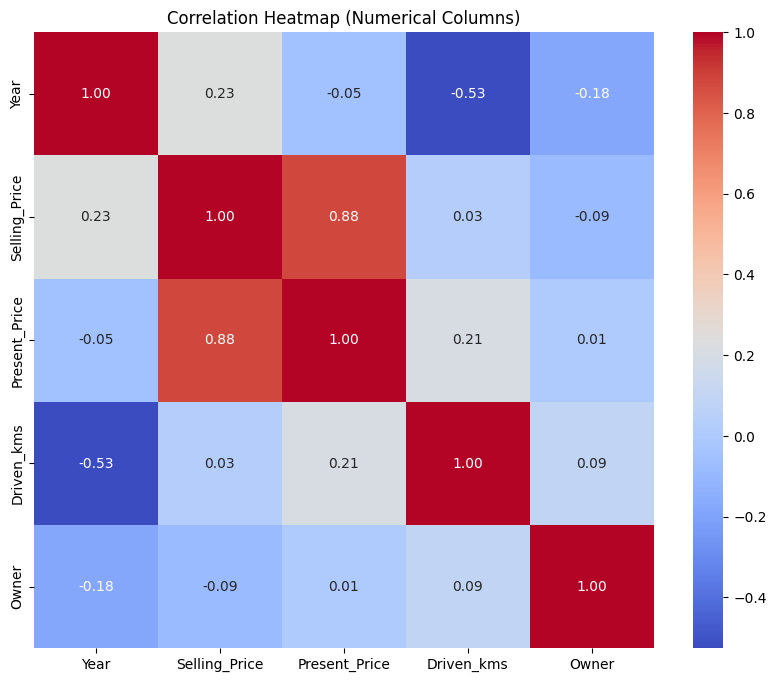

In [11]:
# Select numerical columns
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

# Create a DataFrame containing only the numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

*Observation:*
Strong Positive Correlation: Selling Price and Present Price have a strong positive correlation indicating a almost perfect linear relationship.

*Year's Influence:* Year seems weakly negatively correlated with Selling Price, Present Price, and Driven_Kms. Newer cars-lower Year values have higher selling prices, lower present prices, and lower driven kilometers in data too.

*Mileage:* Driven_Kms shows a weak negative correlation with Selling Price and Present Price. Cars with lower mileage -lower Driven_Kms values tend to sell for more.
->lower the milage driven- higher the car price-observed.

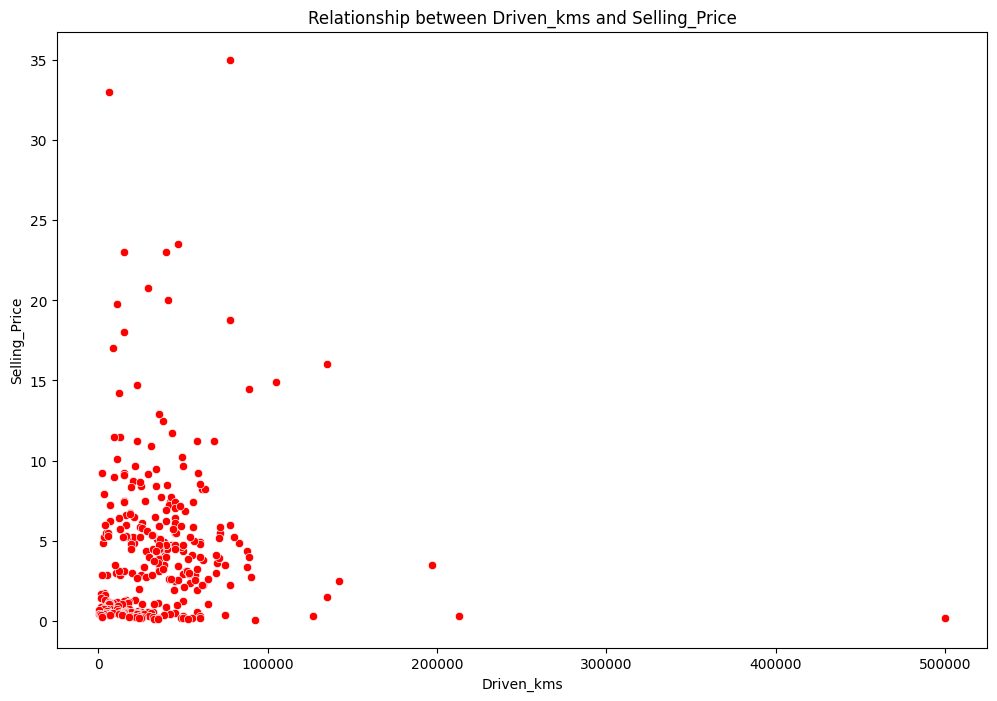

In [14]:
# Scatter plots
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df, color='red')
plt.title('Relationship between Driven_kms and Selling_Price')
plt.show()

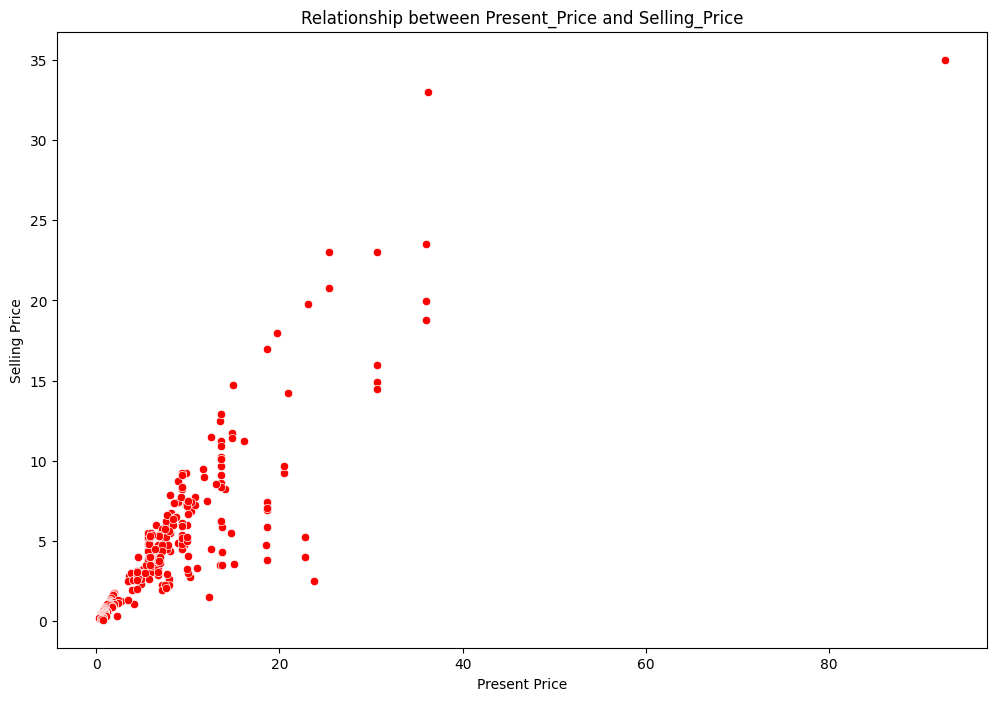

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, color='red')
plt.title('Relationship between Present_Price and Selling_Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')

plt.show()

*Price Match:* The plot reveals a strong positive correlation between Present Price and Selling Price. Cars with a higher present market value tend to sell for more.

*Market Influence:* This suggests the present market value heavily influences the final selling price.

In [17]:
#ENCODING CATEGORICAL FEATURES

# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [18]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [19]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [20]:
Y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
# Training with the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 6.675444100493416
R-squared: 0.7409934356413092


In [24]:
print(y_pred)

[ 7.54014502  7.60794295  1.36086701  6.83816158 11.26433156  4.54331523
  8.58376861  1.70756534  8.64529299 -0.94160222 10.14337954 -1.01048268
  0.67542169  1.55789464  5.06083629  5.09163236  1.31641759  1.85653633
 21.49327773  0.88314714  0.93963548  2.50845369  5.61165281  0.21670439
  6.08447893  7.87210557  8.54340865  1.18938159  4.85780397  4.97259452
  6.43775567  5.58259352  6.09182241  2.72137764  2.9421385   6.78552151
  1.26940674 -4.50895906  1.41583266 10.47339354  7.19171012  8.88257075
  1.62990845  4.06829719  0.97788401 -2.19410353  8.20578844  4.37917527
  5.66473157 -0.58053744  0.64949539  0.18342762 10.51294395  9.30586858
  7.35731165  6.11795426  3.71648613  3.46300975  9.41732863  9.22710174]
